<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/DreamBooth_imageProprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**画像をリサイズする（横幅768px）**

※ローカルです

In [1]:
from PIL import Image

image_path = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image\【腫瘍】翼状片_myt0005.jpg"

image = Image.open(image_path)
width, height = image.size

print("Width:", width)
print("Height:", height)

Width: 3216
Height: 2136


Width: 3216
Height: 2136


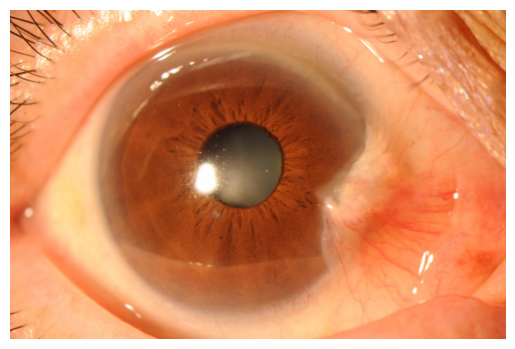

In [2]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image\【腫瘍】翼状片_myt0005.jpg"

# 画像の読み込み
image = Image.open(image_path)

width, height = image.size
print("Width:", width)
print("Height:", height)


# 画像の表示
plt.imshow(image)
plt.axis('off')  # 軸を非表示にする

# 画像ウィンドウを開く
plt.show()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image\【腫瘍】翼状片_myt0005.jpg"

# 画像の読み込み
image = Image.open(image_path)

# 横の長さが768pixになるようにリサイズ
aspect_ratio = float(image.size[1]) / float(image.size[0])
new_width = 768
new_height = int(new_width * aspect_ratio)
resized_image = image.resize((new_width, new_height))

# 縦横比が2:3になるように中央で切り抜き
desired_aspect_ratio = 2 / 3
if aspect_ratio > desired_aspect_ratio:
    desired_height = int(new_width * desired_aspect_ratio)
    top = int((new_height - desired_height) / 2)
    bottom = top + desired_height
    cropped_image = resized_image.crop((0, top, new_width, bottom))
else:
    desired_width = int(new_height / desired_aspect_ratio)
    left = int((new_width - desired_width) / 2)
    right = left + desired_width
    cropped_image = resized_image.crop((left, 0, right, new_height))

width, height = cropped_image.size
print("Width:", width)
print("Height:", height)

# 画像の表示
plt.imshow(cropped_image)
plt.axis('off')  # 軸を非表示にする

# 画像ウィンドウを開く
plt.show()


##**リサイズした画像を保存**

In [ ]:
import os
from PIL import Image
from tqdm import tqdm

def resize_images(input_dir, output_dir, new_width):
    # 出力ディレクトリが存在しない場合は作成する
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 入力ディレクトリ内の画像ファイルを処理する
    filenames = os.listdir(input_dir)
    progress_bar = tqdm(total=len(filenames), desc='Resizing Images')
    for filename in filenames:
        # 画像ファイルのパスを作成
        input_path = os.path.join(input_dir, filename)

        # 画像の読み込み
        image = Image.open(input_path)

        # 横の長さが指定された幅になるようにリサイズ
        aspect_ratio = float(image.size[1]) / float(image.size[0])
        new_height = int(new_width * aspect_ratio)
        resized_image = image.resize((new_width, new_height))

        # 出力ファイルのパスを作成
        output_path = os.path.join(output_dir, filename)

        # リサイズされた画像を保存
        resized_image.save(output_path)

        # 進捗を更新
        progress_bar.update(1)

    # 進捗バーをクローズ
    progress_bar.close()

# 画像のリサイズと保存
input_dir1 = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image"
output_dir1 = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image_768px"
resize_images(input_dir1, output_dir1, 768)

input_dir2 = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\regularized_image"
output_dir2 = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\regularized_image_768px"
resize_images(input_dir2, output_dir2, 768)


Resizing Images: 100%|███████████████████████████████████████████████████████████████| 810/810 [00:29<00:00, 27.05it/s]


#**一辺768pxのletterboxにする場合**

In [5]:
import shutil
import os

# ディレクトリのパスを定義
src_dir = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image_768px"
dst_dir = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image_768px_letterbox"

# 新しいディレクトリを作成
os.makedirs(dst_dir, exist_ok=True)

# ファイルを新しいディレクトリにコピー
for filename in os.listdir(src_dir):
    src_file = os.path.join(src_dir, filename)
    dst_file = os.path.join(dst_dir, filename)
    shutil.copy(src_file, dst_file)


from PIL import Image
import os

# ディレクトリのパスを定義
dir_path = dst_dir

# 新しい画像のサイズを定義（768ピクセル四方）
new_size = (768, 768)

# ディレクトリ内の全てのファイルに対して
for filename in os.listdir(dir_path):
    # ファイルがJPEG画像なら
    if filename.lower().endswith(".jpg"):
        file_path = os.path.join(dir_path, filename)

        # 画像を開く
        img = Image.open(file_path)

        # 元の画像のサイズを保持したまま新しいサイズにリサイズ
        img.thumbnail(new_size, Image.LANCZOS)

        # 新しい画像を作成（黒塗り）
        new_img = Image.new("RGB", new_size, "black")

        # 元の画像を中央に配置
        new_img.paste(img, ((new_size[0] - img.size[0]) // 2, (new_size[1] - img.size[1]) // 2))

        # 画像を保存
        new_img.save(file_path)


#**フォルダ内にあるタグ（.txt）を書き換え**

In [ ]:
#既存のタグを消去して指定のものに書き換える場合

import glob

file_path = r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\regularized_image_768px_dreambooth"

# 指定されたパス内のテキストファイルを抽出
file_list = glob.glob(file_path + "\*.txt")

# 各ファイルの内容を消去して上書き
for file in file_list:
    with open(file, "w") as f:
        f.write("sltphoto")

